<a href="https://colab.research.google.com/github/AleksanderWernik/AI-for-the-Industry-4.0/blob/main/Sensors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A company producing fiber optic sensors decided to implement the AI techniques to automate verification of produced sensors. Currently, after the production of the sensor, its characteristics should be verified each time in three reference substances in order to configure: Air, Water and Isopropanol.
After the procedure in the laboratory they collected three spectroscopic
signals. Unfortunately, such procedures are extremely time consuming and
require large human resources. 
**The main task in this project is to implement AI algorithms** in order to predict characteristics of a working sensor in water and isopropanol based
on measured characteristics in air. It will enable to reduce validation process
only to measurements in the air.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [120]:
cd /content/drive/MyDrive/Github/

[Errno 2] No such file or directory: '/content/drive/MyDrive/Github/'
/content


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import glob
path = r'./drive/MyDrive/Dataset/*'
filenames = glob.glob(path + '/*.txt')

In [5]:
dfs = []
for filename in filenames:
    li = pd.read_csv(filename, sep=',', header=None, names=['sw' + filename, 'sa' + filename])
    dfs.append(li)

In [6]:
df = pd.concat(dfs, axis=1)
df.columns = df.columns.str.replace("/drive/MyDrive/Dataset/", "")
df.columns = df.columns.str.replace(".txt", "")
df.columns = df.columns.str.slice(0, 3) + df.columns.str.slice(16, None)
df

<ipython-input-6-3d4ee3e20573>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df.columns = df.columns.str.replace(".txt", "")


,sw.sensor05_water,sa.sensor05_water,sw.sensor05_izopropanol,sa.sensor05_izopropanol,sw.sensor05_air,sa.sensor05_air,sw.sensor04_air,sa.sensor04_air,sw.sensor04_water,sa.sensor04_water,...,sw.sensor06_water,sa.sensor06_water,sw.sensor06_air,sa.sensor06_air,sw.sensor02_air,sa.sensor02_air,sw.sensor02_water,sa.sensor02_water,sw.sensor02_izopropanol,sa.sensor02_izopropanol
0,0.000001,8.6370,0.000001,8.9739,0.000001,9.4439,0.000001,8.0963,0.000001,7.3714,...,0.000001,8.7331,0.000001,9.4554,0.000001,9.7793,0.000001,9.06070,0.000001,9.254400
1,0.000001,8.8197,0.000001,9.0295,0.000001,9.6645,0.000001,8.1872,0.000001,7.3794,...,0.000001,8.7934,0.000001,9.6052,0.000001,9.8643,0.000001,9.12380,0.000001,9.301200
2,0.000001,8.7279,0.000001,8.9789,0.000001,9.5697,0.000001,8.2061,0.000001,7.3017,...,0.000001,8.7887,0.000001,9.6264,0.000001,9.8031,0.000001,9.11590,0.000001,9.251200
3,0.000001,8.7620,0.000001,8.9369,0.000001,9.6378,0.000001,8.1094,0.000001,7.2528,...,0.000001,8.7277,0.000001,9.5136,0.000001,9.7320,0.000001,9.04310,0.000001,9.273400
4,0.000001,8.7683,0.000001,8.9419,0.000001,9.4933,0.000001,7.9691,0.000001,7.2032,...,0.000001,8.7171,0.000001,9.4042,0.000001,9.6895,0.000001,8.98600,0.000001,9.199900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,0.000002,-1.7018,0.000002,-1.4352,0.000002,2.8330,0.000002,1.5783,0.000002,-2.7569,...,0.000002,-1.8323,0.000002,2.4787,0.000002,3.5505,0.000002,-0.61592,0.000002,-0.394290
2997,0.000002,-1.4070,0.000002,-1.3112,0.000002,2.9789,0.000002,1.7888,0.000002,-2.8164,...,0.000002,-1.7141,0.000002,2.9384,0.000002,3.8237,0.000002,-0.76438,0.000002,-0.215570
2998,0.000002,-1.6194,0.000002,-1.4019,0.000002,2.7841,0.000002,1.3259,0.000002,-2.8534,...,0.000002,-1.9062,0.000002,2.4859,0.000002,3.6708,0.000002,-0.46729,0.000002,-0.296660
2999,0.000002,-1.5367,0.000002,-1.0986,0.000002,2.9465,0.000002,1.6945,0.000002,-2.6457,...,0.000002,-1.7105,0.000002,2.9317,0.000002,3.8785,0.000002,-0.33695,0.000002,-0.117730


Example characteristics from sensor 01 (measured in air, water and isopropanol).

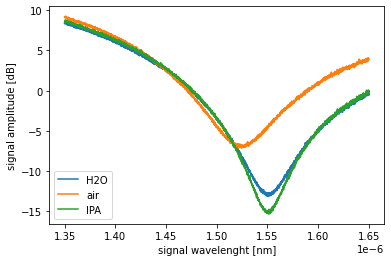

In [8]:
g=sns.lineplot(y='sa.sensor01_water', x='sw.sensor01_water', data=df, label='H2O')
g=sns.lineplot(y='sa.sensor01_air', x='sw.sensor01_air', data=df, label='air')
g=sns.lineplot(y='sa.sensor01_izopropanol', x='sw.sensor01_izopropanol', data=df, label='IPA')
g.set(xlabel= "signal wavelenght [nm]" ,ylabel = 'signal amplitude [dB]')
plt.show()

Characteristics of all sensors (measured in air, water and isopropanol).

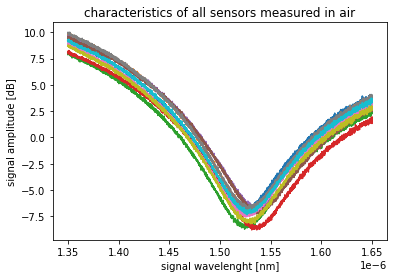

In [14]:
g=sns.lineplot(y='sa.sensor01_air', x='sw.sensor01_air', data=df)
g=sns.lineplot(y='sa.sensor02_air', x='sw.sensor02_air', data=df)
g=sns.lineplot(y='sa.sensor03_air', x='sw.sensor03_air', data=df)
g=sns.lineplot(y='sa.sensor04_air', x='sw.sensor04_air', data=df)
g=sns.lineplot(y='sa.sensor05_air', x='sw.sensor05_air', data=df)
g=sns.lineplot(y='sa.sensor06_air', x='sw.sensor06_air', data=df)
g=sns.lineplot(y='sa.sensor07_air', x='sw.sensor07_air', data=df)
g=sns.lineplot(y='sa.sensor08_air', x='sw.sensor08_air', data=df)
g=sns.lineplot(y='sa.sensor09_air', x='sw.sensor09_air', data=df)
g=sns.lineplot(y='sa.sensor10_air', x='sw.sensor10_air', data=df)
g.set(xlabel= "signal wavelenght [nm]" ,ylabel = 'signal amplitude [dB]', title='characteristics of all sensors measured in air')
plt.show()

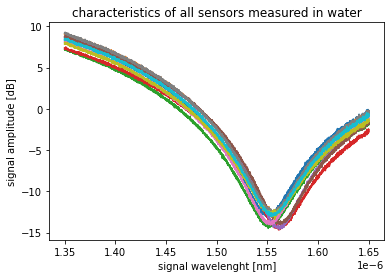

In [16]:
g=sns.lineplot(y='sa.sensor01_water', x='sw.sensor01_water', data=df)
g=sns.lineplot(y='sa.sensor02_water', x='sw.sensor02_water', data=df)
g=sns.lineplot(y='sa.sensor03_water', x='sw.sensor03_water', data=df)
g=sns.lineplot(y='sa.sensor04_water', x='sw.sensor04_water', data=df)
g=sns.lineplot(y='sa.sensor05_water', x='sw.sensor05_water', data=df)
g=sns.lineplot(y='sa.sensor06_water', x='sw.sensor06_water', data=df)
g=sns.lineplot(y='sa.sensor07_water', x='sw.sensor07_water', data=df)
g=sns.lineplot(y='sa.sensor08_water', x='sw.sensor08_water', data=df)
g=sns.lineplot(y='sa.sensor09_water', x='sw.sensor09_water', data=df)
g=sns.lineplot(y='sa.sensor10_water', x='sw.sensor10_water', data=df)
g.set(xlabel= "signal wavelenght [nm]" ,ylabel = 'signal amplitude [dB]', title='characteristics of all sensors measured in water')
plt.show()

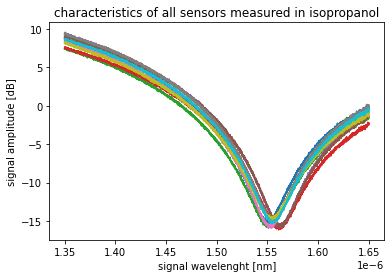

In [17]:
g=sns.lineplot(y='sa.sensor01_izopropanol', x='sw.sensor01_izopropanol', data=df)
g=sns.lineplot(y='sa.sensor02_izopropanol', x='sw.sensor02_izopropanol', data=df)
g=sns.lineplot(y='sa.sensor03_izopropanol', x='sw.sensor03_izopropanol', data=df)
g=sns.lineplot(y='sa.sensor04_izopropanol', x='sw.sensor04_izopropanol', data=df)
g=sns.lineplot(y='sa.sensor05_izopropanol', x='sw.sensor05_izopropanol', data=df)
g=sns.lineplot(y='sa.sensor06_izopropanol', x='sw.sensor06_izopropanol', data=df)
g=sns.lineplot(y='sa.sensor07_izopropanol', x='sw.sensor07_izopropanol', data=df)
g=sns.lineplot(y='sa.sensor08_izopropanol', x='sw.sensor08_izopropanol', data=df)
g=sns.lineplot(y='sa.sensor09_izopropanol', x='sw.sensor09_izopropanol', data=df)
g=sns.lineplot(y='sa.sensor10_izopropanol', x='sw.sensor10_izopropanol', data=df)
g.set(xlabel= "signal wavelenght [nm]" ,ylabel = 'signal amplitude [dB]', title='characteristics of all sensors measured in isopropanol')
plt.show()

The curves looks similar for each measure. There't any outliers.

**min and max values of measures in air**

In [18]:
air_sa = df.loc[:, (df.columns.str.startswith('sa') & (df.columns.str.contains('air')))]
air_sa['min_value_sa'] = air_sa.min(axis=1)
air_sa['max_value_sa'] = air_sa.max(axis=1)
air_sa['mean_value_sa'] = air_sa.mean(axis=1)
sa_air = air_sa[['min_value_sa', 'max_value_sa', 'mean_value_sa']]

<ipython-input-18-254e490de4aa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_sa['min_value_sa'] = air_sa.min(axis=1)
<ipython-input-18-254e490de4aa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_sa['max_value_sa'] = air_sa.max(axis=1)
<ipython-input-18-254e490de4aa>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [19]:
air_sw = df.loc[:, (df.columns.str.startswith('sw') & (df.columns.str.contains('air')))]
air_sw['min_value_sw'] = air_sw.min(axis=1)
air_sw['max_value_sw'] = air_sw.max(axis=1)
air_sw['mean_value_sw'] = air_sw.mean(axis=1)
sw_air = air_sw[['min_value_sw', 'max_value_sw', 'mean_value_sw']]

<ipython-input-19-4c0ac7a11baa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_sw['min_value_sw'] = air_sw.min(axis=1)
<ipython-input-19-4c0ac7a11baa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_sw['max_value_sw'] = air_sw.max(axis=1)
<ipython-input-19-4c0ac7a11baa>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

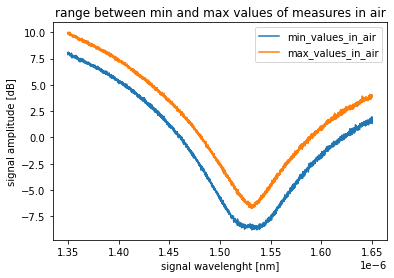

In [21]:
lineplot = pd.merge(sa_air, sw_air, left_index=True, right_index=True)
g=sns.lineplot(y='min_value_sa', x='min_value_sw', data=lineplot, label='min_values_in_air')
g=sns.lineplot(y='max_value_sa', x='max_value_sw', data=lineplot, label='max_values_in_air')
g.set(xlabel= "signal wavelenght [nm]" ,ylabel = 'signal amplitude [dB]', title='range between min and max values of measures in air')
plt.show()

All curves measured in air are similar 

**Mean values of measures for air, water and izopropanol.**

In [22]:
h2o_sa = df.loc[:, (df.columns.str.startswith('sa') & (df.columns.str.contains('water')))]
h2o_sa['mean_value_sa'] = h2o_sa.mean(axis=1)
h2o_sa_mean = h2o_sa['mean_value_sa']
h2o_sw = df.loc[:, (df.columns.str.startswith('sw') & (df.columns.str.contains('water')))]
h2o_sw['mean_value_sw'] = h2o_sw.mean(axis=1)
h2o_sw_mean = h2o_sw['mean_value_sw']
h2o_mean = pd.merge(h2o_sa_mean, h2o_sw_mean, left_index=True, right_index=True)  # mean values for water

<ipython-input-22-af3d52dab39e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h2o_sa['mean_value_sa'] = h2o_sa.mean(axis=1)
<ipython-input-22-af3d52dab39e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h2o_sw['mean_value_sw'] = h2o_sw.mean(axis=1)


In [23]:
ipa_sa = df.loc[:, (df.columns.str.startswith('sa') & (df.columns.str.contains('izopropanol')))]
ipa_sa['mean_value_sa'] = ipa_sa.mean(axis=1)
ipa_sa_mean = ipa_sa['mean_value_sa']
ipa_sw = df.loc[:, (df.columns.str.startswith('sw') & (df.columns.str.contains('izopropanol')))]
ipa_sw['mean_value_sw'] = ipa_sw.mean(axis=1)
ipa_sw_mean = ipa_sw['mean_value_sw']
ipa_mean = pd.merge(ipa_sa_mean, ipa_sw_mean, left_index=True, right_index=True) # mean values for izopropanol

<ipython-input-23-9425819fbcd9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ipa_sa['mean_value_sa'] = ipa_sa.mean(axis=1)
<ipython-input-23-9425819fbcd9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ipa_sw['mean_value_sw'] = ipa_sw.mean(axis=1)


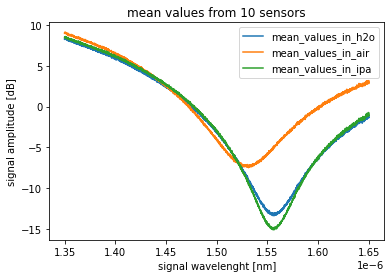

In [24]:
g=sns.lineplot(y='mean_value_sa', x='mean_value_sw', data=h2o_mean, label='mean_values_in_h2o')
g=sns.lineplot(y='mean_value_sa', x='mean_value_sw', data=lineplot, label='mean_values_in_air')
g=sns.lineplot(y='mean_value_sa', x='mean_value_sw', data=ipa_mean, label='mean_values_in_ipa')
g.set(xlabel= "signal wavelenght [nm]" ,ylabel = 'signal amplitude [dB]', title='mean values from 10 sensors')
plt.show()

**Predict points on water curve with values from air curve**

1. Signal amplitude (sa) at first

In [65]:
air_sw = df.loc[:, (df.columns.str.startswith('sw') & (df.columns.str.contains('air')))]
air_sa = df.loc[:, (df.columns.str.startswith('sa') & (df.columns.str.contains('air')))]

In [66]:
sa_air_h2o = pd.merge(air_sa, h2o_sa_mean, left_index=True, right_index=True)
sa_air_h2o

,sa.sensor05_air,sa.sensor04_air,sa.sensor08_air,sa.sensor07_air,sa.sensor09_air,sa.sensor10_air,sa.sensor03_air,sa.sensor01_air,sa.sensor06_air,sa.sensor02_air,mean_value_sa
0,9.4439,8.0963,9.9081,8.8064,8.6910,9.2124,7.8831,9.1792,9.4554,9.7793,8.294310
1,9.6645,8.1872,10.0010,8.9714,8.7223,9.2734,8.0971,9.2003,9.6052,9.8643,8.398190
2,9.5697,8.2061,9.9366,8.9747,8.7796,9.1703,7.9478,9.1968,9.6264,9.8031,8.345490
3,9.6378,8.1094,9.8126,8.8461,8.6753,9.2478,7.9979,9.1028,9.5136,9.7320,8.317480
4,9.4933,7.9691,9.8773,8.8265,8.6667,9.0771,7.9220,9.0601,9.4042,9.6895,8.250110
...,...,...,...,...,...,...,...,...,...,...,...
2996,2.8330,1.5783,3.7791,2.9408,2.7312,3.2784,2.3074,3.8310,2.4787,3.5505,-1.320583
2997,2.9789,1.7888,3.6568,3.2277,2.7287,3.4213,2.3935,3.8613,2.9384,3.8237,-1.282892
2998,2.7841,1.3259,3.7064,2.8527,2.5725,3.3112,2.2550,3.8361,2.4859,3.6708,-1.391228
2999,2.9465,1.6945,3.7920,3.3101,2.7335,3.4500,2.4935,3.9466,2.9317,3.8785,-1.165640


In [69]:
X1 = sa_air_h2o.drop(columns=['mean_value_sa'])   # values from air curve from each point
y1 = sa_air_h2o['mean_value_sa']          # mean value for water curve for each point

In [71]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train1,y_test1 = train_test_split(X1,y1,test_size=0.2,random_state=1)
scaler = StandardScaler()
scaler.fit(X_train1)
X_train1 = scaler.transform(X_train1)
X_test1 = scaler.transform(X_test1)

In [51]:
# Modelling Libraries
from sklearn.linear_model import LinearRegression, Ridge, Lasso, BayesianRidge, SGDRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Evaluation & CV Libraries
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,explained_variance_score
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold, cross_val_score, KFold

In [72]:
models = [('RF',RandomForestRegressor(random_state=1)), ('XGB', XGBRegressor(random_state=1)), ("LR", LinearRegression()), ("RDG", Ridge(random_state=1)), ("LAS", Lasso(random_state=1)), 
          ("BR", BayesianRidge()), ("SGD", SGDRegressor(random_state=1)), ("LGBM",LGBMRegressor(random_state=1)), ('GBR',GradientBoostingRegressor(random_state=1))]

results = []
names = []
finalResults = []

for name,model in models:
    model.fit(X_train1, y_train1)
    model_results = model.predict(X_test1)
    score = r2_score(y_test1, model_results)
    results.append(score)
    names.append(name)
    finalResults.append((name,score))
    
finalResults.sort(key=lambda k:k[1],reverse=True)

finalResults

[('RF', 0.999667845288253),
 ('XGB', 0.9993844757254131),
 ('LGBM', 0.9993552925805131),
 ('GBR', 0.9984379769338861),
 ('BR', 0.9951066649355682),
 ('LR', 0.9951045544231218),
 ('RDG', 0.9945492717097925),
 ('SGD', 0.9918625755044163),
 ('LAS', 0.866808898967236)]

2. The same for signal wavelenght (sw)

In [54]:
sw_air_h2o = pd.merge(air_sw, h2o_sw_mean, left_index=True, right_index=True)
sw_air_h2o

,sw.sensor05_air,sw.sensor04_air,sw.sensor08_air,sw.sensor07_air,sw.sensor09_air,sw.sensor10_air,sw.sensor03_air,sw.sensor01_air,sw.sensor06_air,sw.sensor02_air,mean_value_sw
0,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001
1,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001
2,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001
3,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001
4,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001
...,...,...,...,...,...,...,...,...,...,...,...
2996,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002
2997,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002
2998,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002
2999,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002


In [75]:
X2 = sw_air_h2o.drop(columns=['mean_value_sw'])   # values from air curve from each point
y2 = sw_air_h2o['mean_value_sw']          # mean value for water curve for each point

In [76]:
X_train2,X_test2,y_train2,y_test2 = train_test_split(X2,y2,test_size=0.2,random_state=1)
scaler = StandardScaler()
scaler.fit(X_train2)
X_train2 = scaler.transform(X_train2)
X_test2 = scaler.transform(X_test2)

In [78]:
models = [('RF',RandomForestRegressor(random_state=1)), ('XGB', XGBRegressor(random_state=1)), ("LR", LinearRegression()), ("RDG", Ridge(random_state=1)), ("LAS", Lasso(random_state=1)), 
          ("BR", BayesianRidge()), ("SGD", SGDRegressor(random_state=1)), ("LGBM",LGBMRegressor(random_state=1)), ('GBR',GradientBoostingRegressor(random_state=1))]

results = []
names = []
finalResults = []

for name,model in models:
    model.fit(X_train2, y_train2)
    model_results = model.predict(X_test2)
    score = r2_score(y_test2, model_results)
    results.append(score)
    names.append(name)
    finalResults.append((name,score))
    
finalResults.sort(key=lambda k:k[1],reverse=True)

finalResults

[('LR', 1.0),
 ('BR', 0.9999999999999997),
 ('SGD', 0.9999999998943098),
 ('RDG', 0.9999999982632105),
 ('LGBM', 0.9999760207335091),
 ('RF', 0.9887770776599977),
 ('GBR', 0.971078096583914),
 ('XGB', -0.00047407082748640583),
 ('LAS', -0.00047411576678357825)]

**Predict points on izopropanol curve with values from air curve**

I'll do the same as for water curve

In [37]:
ipa_sw = df.loc[:, (df.columns.str.startswith('sw') & (df.columns.str.contains('izopropanol')))]
ipa_sa = df.loc[:, (df.columns.str.startswith('sa') & (df.columns.str.contains('izopropanol')))]

In [84]:
sa_air_ipa = pd.merge(air_sa, ipa_sa_mean, left_index=True, right_index=True)  # sa - signal amplitude
sa_air_ipa

,sa.sensor05_air,sa.sensor04_air,sa.sensor08_air,sa.sensor07_air,sa.sensor09_air,sa.sensor10_air,sa.sensor03_air,sa.sensor01_air,sa.sensor06_air,sa.sensor02_air,mean_value_sa
0,9.4439,8.0963,9.9081,8.8064,8.6910,9.2124,7.8831,9.1792,9.4554,9.7793,8.482070
1,9.6645,8.1872,10.0010,8.9714,8.7223,9.2734,8.0971,9.2003,9.6052,9.8643,8.587220
2,9.5697,8.2061,9.9366,8.9747,8.7796,9.1703,7.9478,9.1968,9.6264,9.8031,8.543580
3,9.6378,8.1094,9.8126,8.8461,8.6753,9.2478,7.9979,9.1028,9.5136,9.7320,8.519220
4,9.4933,7.9691,9.8773,8.8265,8.6667,9.0771,7.9220,9.0601,9.4042,9.6895,8.463710
...,...,...,...,...,...,...,...,...,...,...,...
2996,2.8330,1.5783,3.7791,2.9408,2.7312,3.2784,2.3074,3.8310,2.4787,3.5505,-1.098305
2997,2.9789,1.7888,3.6568,3.2277,2.7287,3.4213,2.3935,3.8613,2.9384,3.8237,-1.024405
2998,2.7841,1.3259,3.7064,2.8527,2.5725,3.3112,2.2550,3.8361,2.4859,3.6708,-1.145589
2999,2.9465,1.6945,3.7920,3.3101,2.7335,3.4500,2.4935,3.9466,2.9317,3.8785,-0.828951


In [85]:
X3 = sa_air_ipa.drop(columns=['mean_value_sa'])   # values from air curve from each point
y3 = sa_air_ipa['mean_value_sa']          # mean value for ipa curve for each point

In [86]:
X_train3,X_test3,y_train3,y_test3 = train_test_split(X3,y3,test_size=0.2,random_state=1)
scaler = StandardScaler()
scaler.fit(X_train3)
X_train3 = scaler.transform(X_train3)
X_test3 = scaler.transform(X_test3)

In [87]:
models = [('RF',RandomForestRegressor(random_state=1)), ('XGB', XGBRegressor(random_state=1)), ("LR", LinearRegression()), ("RDG", Ridge(random_state=1)), ("LAS", Lasso(random_state=1)), 
          ("BR", BayesianRidge()), ("SGD", SGDRegressor(random_state=1)), ("LGBM",LGBMRegressor(random_state=1)), ('GBR',GradientBoostingRegressor(random_state=1))]

results = []
names = []
finalResults = []

for name,model in models:
    model.fit(X_train3, y_train3)
    model_results = model.predict(X_test3)
    score = r2_score(y_test3, model_results)
    results.append(score)
    names.append(name)
    finalResults.append((name,score))
    
finalResults.sort(key=lambda k:k[1],reverse=True)

finalResults

[('RF', 0.99968320409924),
 ('LGBM', 0.9992181960863559),
 ('XGB', 0.9988162136653589),
 ('GBR', 0.9982666529311169),
 ('BR', 0.9921697496264528),
 ('LR', 0.9921653826464845),
 ('RDG', 0.9915997786271415),
 ('SGD', 0.989474179750404),
 ('LAS', 0.8588951180386307)]

In [43]:
sw_air_ipa = pd.merge(air_sw, ipa_sw_mean, left_index=True, right_index=True)  # sw - signal wavelenght
sw_air_ipa

,sw.sensor05_air,sw.sensor04_air,sw.sensor08_air,sw.sensor07_air,sw.sensor09_air,sw.sensor10_air,sw.sensor03_air,sw.sensor01_air,sw.sensor06_air,sw.sensor02_air,mean_value_sw
0,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001
1,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001
2,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001
3,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001
4,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001
...,...,...,...,...,...,...,...,...,...,...,...
2996,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002
2997,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002
2998,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002
2999,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002


In [103]:
X4 = sw_air_ipa.drop(columns=['mean_value_sw'])   # values from air curve from each point
y4 = sw_air_ipa['mean_value_sw']          # mean value for ipa curve for each point

In [104]:
X_train4,X_test4,y_train4,y_test4 = train_test_split(X4,y4,test_size=0.2,random_state=1)
scaler = StandardScaler()
scaler.fit(X_train4)
X_train4 = scaler.transform(X_train4)
X_test4 = scaler.transform(X_test4)

In [105]:
models = [('RF',RandomForestRegressor(random_state=1)), ('XGB', XGBRegressor(random_state=1)), ("LR", LinearRegression()), ("RDG", Ridge(random_state=1)), ("LAS", Lasso(random_state=1)), 
          ("BR", BayesianRidge()), ("SGD", SGDRegressor(random_state=1)), ("LGBM",LGBMRegressor(random_state=1)), ('GBR',GradientBoostingRegressor(random_state=1))]

results = []
names = []
finalResults = []

for name,model in models:
    model.fit(X_train4, y_train4)
    model_results = model.predict(X_test4)
    score = r2_score(y_test4, model_results)
    results.append(score)
    names.append(name)
    finalResults.append((name,score))
    
finalResults.sort(key=lambda k:k[1],reverse=True)

finalResults

[('LR', 1.0),
 ('BR', 0.9999999999999997),
 ('SGD', 0.9999999998943098),
 ('RDG', 0.9999999982632105),
 ('LGBM', 0.9999760207335091),
 ('RF', 0.9887770776599977),
 ('GBR', 0.971078096583914),
 ('XGB', -0.00047407082748640583),
 ('LAS', -0.00047411576678357825)]

**I'll use GradientBoostingRegressor model**

1st model for signal amplitude in water 

In [108]:
model = GradientBoostingRegressor(random_state=1)
model.fit(X_train1, y_train1)
model_results1 = model.predict(X_test1)
score1 = r2_score(y_test1, model_results1)
print("R2 score: {:.4f}".format(score1))

R2 score: 0.9984


In [95]:
pred_gbr1=pd.DataFrame(data={'predictions':model_results, 'actual':y_test1.values})
pred_gbr1.sample(5)

,predictions,actual
60,-4.199549,-4.37840
378,-9.357883,-9.21135
26,-2.417773,-2.57493
310,-5.454658,-5.61545
122,-6.620451,-6.31472


2nd model for signal wavelenght in water

In [109]:
model = GradientBoostingRegressor(random_state=1)
model.fit(X_train2, y_train2)
model_results2 = model.predict(X_test2)
score2 = r2_score(y_test2, model_results2)
print("R2 score: {:.4f}".format(score2))

R2 score: 0.9711


In [110]:
pred_gbr2=pd.DataFrame(data={'predictions':model_results2, 'actual':y_test2.values})
pred_gbr2.sample(5)

,predictions,actual
531,0.000001,0.000001
66,0.000002,0.000002
46,0.000002,0.000002
138,0.000001,0.000001
310,0.000002,0.000002


3rd model for signal amplitude in izopropanol

In [100]:
model = GradientBoostingRegressor(random_state=1)
model.fit(X_train3, y_train3)
model_results3 = model.predict(X_test3)
score3 = r2_score(y_test3, model_results3)
print("R2 score: {:.4f}".format(score3))

R2 score: 0.9983


In [102]:
pred_gbr3=pd.DataFrame(data={'predictions':model_results3, 'actual':y_test3.values})
pred_gbr3.sample(5)

,predictions,actual
50,-7.903128,-8.128050
191,-3.589277,-3.776500
109,1.338669,1.131254
544,1.224181,1.246135
187,5.578543,5.571110


4th model for signal wavelength in izopropanol

In [106]:
model = GradientBoostingRegressor(random_state=1)
model.fit(X_train4, y_train4)
model_results4 = model.predict(X_test4)
score4 = r2_score(y_test4, model_results4)
print("R2 score: {:.4f}".format(score4))

R2 score: 0.9711


In [107]:
pred_gbr4=pd.DataFrame(data={'predictions':model_results4, 'actual':y_test4.values})
pred_gbr4.sample(5)

,predictions,actual
347,0.000002,0.000002
249,0.000001,0.000001
600,0.000002,0.000002
533,0.000002,0.000002
210,0.000002,0.000002


**Hyperparameter tuning**

In [111]:
params = { 'learning_rate':[0.01,0.1,1], 'n_estimators':[50,100,200], 'max_depth':[3,4], 'random_state':[1]}

grid_1 = GridSearchCV(GradientBoostingRegressor(), params, cv=5)
grid_1.fit(X_train1, y_train1)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 1], 'max_depth': [3, 4],
                         'n_estimators': [50, 100, 200], 'random_state': [1]})

In [113]:
print('Best parameters: {}'.format(grid_1.best_params_))
print('Best score for model 1: {}'.format(grid_1.best_score_))

Best parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200, 'random_state': 1}
Best score for model 1: 0.9989460136074582


In [114]:
model = GradientBoostingRegressor(random_state=1, max_depth=4, n_estimators=200)
model.fit(X_train2, y_train2)
model_results2 = model.predict(X_test2)
score2 = r2_score(y_test2, model_results2)
print("Best score for model 2 after GridSearch: {:.4f}".format(score2))

Best score for model 2 after GridSearch: 0.9711


In [117]:
model = GradientBoostingRegressor(random_state=1, max_depth=4, n_estimators=200)
model.fit(X_train3, y_train3)
model_results3 = model.predict(X_test3)
score3 = r2_score(y_test3, model_results3)
print("Best score for model 3 after GridSearch: {:.4f}".format(score3))

Best score for model 3 after GridSearch: 0.9989


In [119]:
model = GradientBoostingRegressor(random_state=1, max_depth=4, n_estimators=200)
model.fit(X_train4, y_train4)
model_results4 = model.predict(X_test4)
score4 = r2_score(y_test4, model_results4)
print("Best score for model 4 after GridSearch: {:.4f}".format(score4))

Best score for model 4 after GridSearch: 0.9711


The best results I received from GradientBoostingRegressor model. Other models didn't work out, because of overfitting.

The main problem was with small quantity of measurments (data only from 10 tests). If I had more data from sensors the result would be much more fitted to real curves.